In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os

In [2]:
data = pd.read_csv("60Activities-poseData.csv")

## Preprocessing

In [3]:
def clean(values):
    
    # Remove parantheses and white spaces
    string_list = [re.sub(r"[][\s]", "", x).split(",") for x in values]
    
    # Convert strings to floats
    return [[float(val) for val in string] for string in string_list]

In [4]:
df = data[data.columns.tolist()[1:]].apply(clean, axis="columns")
df = pd.DataFrame(df.tolist(), columns = data.columns.tolist()[1:])

In [5]:
# Reorder columns so that name appears first
df['name'] = data['name']
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

In [6]:
df.head()

,name,xX_left_shoulder,yY_left_shoulder,zZ_left_shoulder,xX_right_shoulder,yY_right_shoulder,zZ_right_shoulder,xX_left_elbow,yY_left_elbow,zZ_left_elbow,...,zZ_left_knee,xX_right_knee,yY_right_knee,zZ_right_knee,xX_left_ankle,yY_left_ankle,zZ_left_ankle,xX_right_ankle,yY_right_ankle,zZ_right_ankle
0,angled leg presses,"[0.6244075298309326, 0.6202492713928223, 0.625...","[0.6125868558883667, 0.6116636991500854, 0.614...","[-0.7317232489585876, -0.7084757089614868, -0....","[0.7274216413497925, 0.7407364845275879, 0.745...","[0.5923414826393127, 0.607475757598877, 0.6018...","[-0.2771779000759125, -0.31190672516822815, -0...","[0.45598286390304565, 0.4522373676300049, 0.45...","[0.7025633454322815, 0.7008029818534851, 0.700...","[-0.8455376625061035, -0.7739219665527344, -0....",...,"[-0.18987344205379486, -0.0501105897128582, -0...","[0.3456818461418152, 0.35185500979423523, 0.37...","[0.4793410003185272, 0.48256415128707886, 0.48...","[0.25488728284835815, 0.33376675844192505, 0.3...","[0.06234923005104065, 0.05919414758682251, 0.0...","[0.36329522728919983, 0.3608418405056, 0.36984...","[-0.06779885292053223, 0.08755621314048767, 0....","[0.24116382002830505, 0.23082193732261658, 0.2...","[0.3432755172252655, 0.34823083877563477, 0.34...","[0.41889476776123047, 0.49117857217788696, 0.4..."
1,arnold press,"[0.6750805377960205, 0.6730958819389343, 0.674...","[0.3685726225376129, 0.36425328254699707, 0.36...","[-0.023685937747359276, -0.028867069631814957,...","[0.47216328978538513, 0.47299060225486755, 0.4...","[0.3719647526741028, 0.368996262550354, 0.3686...","[-0.08193735778331757, -0.10326733440160751, -...","[0.6953715085983276, 0.6981197595596313, 0.706...","[0.4491013288497925, 0.44966304302215576, 0.45...","[-0.3566053807735443, -0.35106605291366577, -0...",...,"[-0.6593864560127258, -0.6449337601661682, -0....","[0.48968997597694397, 0.48874959349632263, 0.4...","[0.6085264682769775, 0.6103435158729553, 0.610...","[-0.8127835988998413, -0.8063545227050781, -0....","[0.7018957734107971, 0.7013241052627563, 0.701...","[0.742508590221405, 0.7433649301528931, 0.7421...","[-0.3053855001926422, -0.27191391587257385, -0...","[0.48945480585098267, 0.48833632469177246, 0.4...","[0.7392826080322266, 0.739270806312561, 0.7423...","[-0.3828478753566742, -0.3595616817474365, -0...."
2,back extensions,"[0.24804607033729553, 0.26040884852409363, 0.2...","[0.4517459571361542, 0.45352500677108765, 0.45...","[-0.3853210508823395, -0.37524843215942383, -0...","[0.23037508130073547, 0.23251590132713318, 0.2...","[0.4661741554737091, 0.46856704354286194, 0.47...","[0.28441742062568665, 0.28328651189804077, 0.2...","[0.37875789403915405, 0.3819432854652405, 0.38...","[0.4680253565311432, 0.4703821539878845, 0.469...","[-0.6757698059082031, -0.6794125437736511, -0....",...,"[-0.2013997733592987, -0.18110059201717377, -0...","[0.6978815793991089, 0.7043741941452026, 0.700...","[0.6545929908752441, 0.6574983596801758, 0.661...","[0.45003992319107056, 0.41382306814193726, 0.4...","[0.9378144145011902, 0.9393232464790344, 0.940...","[0.7470904588699341, 0.743262529373169, 0.7441...","[-0.1447303295135498, -0.076068215072155, -0.0...","[0.8562198877334595, 0.8520399332046509, 0.866...","[0.7071706056594849, 0.7047874331474304, 0.709...","[0.7344235777854919, 0.7165142893791199, 0.722..."
3,back presses,"[0.5400533080101013, 0.5398567914962769, 0.539...","[0.30235743522644043, 0.3022450804710388, 0.30...","[0.18136030435562134, 0.18636830151081085, 0.1...","[0.4811861217021942, 0.48017001152038574, 0.47...","[0.3090822100639343, 0.30989527702331543, 0.30...","[-0.02199406921863556, -0.012855282053351402, ...","[0.5700136423110962, 0.5703814625740051, 0.570...","[0.24835893511772156, 0.24547149240970612, 0.2...","[0.2516632080078125, 0.24780821800231934, 0.26...",...,"[-0.11309728771448135, -0.12462121993303299, -...","[0.5247339606285095, 0.5247664451599121, 0.525...","[0.5397233366966248, 0.543906033039093, 0.5451...","[-0.4834393858909607, -0.48

## Function to run Matplotlib animation

In [7]:
def run(frame):
    ax.clear()
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_zlim(-1,1)
    
    # Shoulder to Elbow
    ax.plot([anim_data['xX_left_shoulder'][frame], anim_data['xX_left_elbow'][frame]], 
            [anim_data['yY_left_shoulder'][frame], anim_data['yY_left_elbow'][frame]], 
            [anim_data['zZ_left_shoulder'][frame], anim_data['zZ_left_elbow'][frame]], color='tab:red', marker='o')
    
    ax.plot([anim_data['xX_right_shoulder'][frame], anim_data['xX_right_elbow'][frame]], 
            [anim_data['yY_right_shoulder'][frame], anim_data['yY_right_elbow'][frame]], 
            [anim_data['zZ_right_shoulder'][frame], anim_data['zZ_right_elbow'][frame]], color='tab:red', marker='o')
    
    # Elbow to Wrist
    ax.plot([anim_data['xX_left_elbow'][frame], anim_data['xX_left_wrist'][frame]], 
            [anim_data['yY_left_elbow'][frame], anim_data['yY_left_wrist'][frame]], 
            [anim_data['zZ_left_elbow'][frame], anim_data['zZ_left_wrist'][frame]], color='green', marker='o')
    
    ax.plot([anim_data['xX_right_elbow'][frame], anim_data['xX_right_wrist'][frame]], 
            [anim_data['yY_right_elbow'][frame], anim_data['yY_right_wrist'][frame]], 
            [anim_data['zZ_right_elbow'][frame], anim_data['zZ_right_wrist'][frame]], color='green', marker='o')
    
    # Left Shoulder to Right Shoulder
    ax.plot([anim_data['xX_right_shoulder'][frame], anim_data['xX_left_shoulder'][frame]], 
            [anim_data['yY_right_shoulder'][frame], anim_data['yY_left_shoulder'][frame]], 
            [anim_data['zZ_right_shoulder'][frame], anim_data['zZ_left_shoulder'][frame]], color='gold', marker='o')
    
    # Shoulder to Hip
    ax.plot([anim_data['xX_left_hip'][frame], anim_data['xX_left_shoulder'][frame]], 
            [anim_data['yY_left_hip'][frame], anim_data['yY_left_shoulder'][frame]], 
            [anim_data['zZ_left_hip'][frame], anim_data['zZ_left_shoulder'][frame]], color='tab:blue', marker='o')
    
    ax.plot([anim_data['xX_right_hip'][frame], anim_data['xX_right_shoulder'][frame]], 
            [anim_data['yY_right_hip'][frame], anim_data['yY_right_shoulder'][frame]], 
            [anim_data['zZ_right_hip'][frame], anim_data['zZ_right_shoulder'][frame]], color='tab:blue', marker='o')
    
    # Hip to Knee
    ax.plot([anim_data['xX_left_hip'][frame], anim_data['xX_left_knee'][frame]], 
            [anim_data['yY_left_hip'][frame], anim_data['yY_left_knee'][frame]], 
            [anim_data['zZ_left_hip'][frame], anim_data['zZ_left_knee'][frame]], color='slategray', marker='o')
    
    ax.plot([anim_data['xX_right_hip'][frame], anim_data['xX_right_knee'][frame]], 
            [anim_data['yY_right_hip'][frame], anim_data['yY_right_knee'][frame]], 
            [anim_data['zZ_right_hip'][frame], anim_data['zZ_right_knee'][frame]], color='slategray', marker='o')
    
    # Right Hip to Left Hip
    ax.plot([anim_data['xX_right_hip'][frame], anim_data['xX_left_hip'][frame]], 
            [anim_data['yY_right_hip'][frame], anim_data['yY_left_hip'][frame]], 
            [anim_data['zZ_right_hip'][frame], anim_data['zZ_left_hip'][frame]], color='orange', marker='o')
    
    # Knee to Ankle
    ax.plot([anim_data['xX_right_ankle'][frame], anim_data['xX_right_knee'][frame]], 
            [anim_data['yY_right_ankle'][frame], anim_data['yY_right_knee'][frame]], 
            [anim_data['zZ_right_ankle'][frame], anim_data['zZ_right_knee'][frame]], color='darkorchid', marker='o')
    
    ax.plot([anim_data['xX_left_ankle'][frame], anim_data['xX_left_knee'][frame]], 
            [anim_data['yY_left_ankle'][frame], anim_data['yY_left_knee'][frame]], 
            [anim_data['zZ_left_ankle'][frame], anim_data['zZ_left_knee'][frame]], color='darkorchid', marker='o')
    


In [8]:
# Rotations of coordinate axes for each exercise
rotations = {0:[90,90], 1:[90,90], 2:[90,90], 3:[180,180], 4:[0,0], 5:[60,60], 6:[90,90], 7:[90,90], 8:[90,90], 9:[90,90], 10:[90,90], 
             11:[-90,-90], 12:[-90,-60], 13:[-90,-90], 14:[-90,-90], 15:[-90,-90], 16:[-90,-90], 17:[-75,-90], 18:[-60,-90], 19:[-90,-120], 
             20:[-90,-90], 21:[-90,-90], 22:[-30,-60], 23:[-90,-90], 24:[-90,-90], 25:[-90,-90], 26:[-90,-90], 27:[-90,-90], 28:[-150,-40], 
             29:[-90,-90], 30:[-120,-90], 31:[-90,-90], 32:[-90,-90], 33:[-90,-90], 34:[-90,-90], 35:[-90,-90], 36:[-90,-90], 37:[-90,-90], 
             38:[-90,-90], 39:[-90,-90], 40:[-90,-90], 41:[-90,-90], 42:[-90,-90], 43:[-90,-90], 44:[-90,-90], 45:[-90,-100], 46:[-90,-90], 
             47:[-90,-90], 48:[-90,-90], 49:[-90,-90], 50:[-90,-90], 51:[-90,-90], 52:[-90,-90], 53:[-90,-90], 54:[-90,-90], 55:[-90,-90], 
             56:[-120,-90], 57:[-90,-90], 58:[-90,-90], 59:[-90,-85], 60:[-90,-90]}

## Find angles between lists of coordinates

In [9]:
def angles(x1, y1, z1, x2, y2, z2, x3, y3, z3):
    '''
    # Arguments
        (x1,y1,z1) : List of the coordinates of the end of body part 1 at each timestep
        (x2,y2,z2) : List of the coordinates of the joint of the two body parts at each timestep
        (x3,y3,z3) : List of the coordinates of the end of body part 2 at each timestep
    '''
    
    # Vectors joining the two body parts
    v1 = np.c_[np.array(x1) - np.array(x2), np.array(y1) - np.array(y2), np.array(z1) - np.array(z2)]
    v2 = np.c_[np.array(x3) - np.array(x2), np.array(y3) - np.array(y2), np.array(z3) - np.array(z2)]
    
    # Direction of v1 and v2
    v1_dir = v1/np.linalg.norm(v1, axis=1).reshape(-1,1)
    v2_dir = v2/np.linalg.norm(v2, axis=1).reshape(-1,1)
    
    # Dot product
    dot = (v1_dir*v2_dir).sum(axis=1)
    
    # Angle between v1 and v2
    return np.rad2deg(np.arccos(dot))
    

In [10]:
# Adjacent joints for each joint
joints = {"right_elbow":["right_shoulder","right_elbow","right_wrist"], "right_shoulder":["right_elbow","right_shoulder","right_hip"], 
          "right_hip":["right_shoulder","right_hip","right_knee"], "right_knee":["right_hip","right_knee","right_ankle"], 
          "left_elbow":["left_shoulder","left_elbow","left_wrist"], "left_shoulder":["left_elbow","left_shoulder","left_hip"], 
          "left_hip":["left_shoulder","left_hip","left_knee"], "left_knee":["left_hip","left_knee","left_ankle"]}

In [11]:
if not os.path.exists("Animations"):
    os.makedirs("Animations")

In [12]:
def exercise_info():
    
    # Visualization
    a = FuncAnimation(fig, run, interval=100, repeat=True)
    a.save("Animations/" + str(exercise_num) + "_" + df.name[exercise_num] + ".gif")
    
    print(anim_data[0].title())
    
    # Angle changes
    differences = []
    var = []
    sd = []
    for joint in joints.keys():
        joints_list = anim_data[list(np.array([[coord + x for x in joints.get(joint)] for coord in ["xX_", "yY_", "zZ_"]]).ravel())].tolist()
        ang = angles(x1=joints_list[0], y1=joints_list[3], z1=joints_list[6], 
                     x2=joints_list[1], y2=joints_list[4], z2=joints_list[7], 
                     x3=joints_list[2], y3=joints_list[5], z3=joints_list[8])
        differences.append(ang.max() - ang.min())
        var.append(np.var(ang))
        sd.append(np.std(ang))
    
    print("\nMoving Joints:\n")
    print("diff", np.array(list(joints.keys()))[np.where(differences>np.mean(differences))[0]])
    print("var", np.array(list(joints.keys()))[np.where(var>np.mean(var))[0]])
    print("sd", np.array(list(joints.keys()))[np.where(sd>np.mean(sd))[0]])

Leg Extensions

Moving Joints:

diff ['right_knee' 'left_knee']
var ['right_knee' 'left_knee']
sd ['right_knee' 'left_knee']


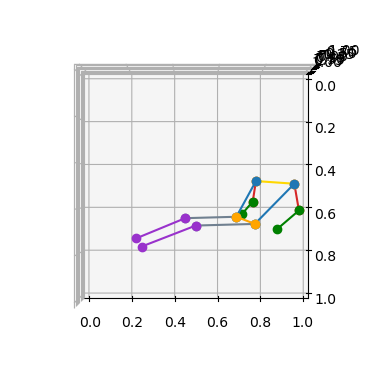

In [13]:
exercise_num = 34

fig = plt.figure(figsize=(4.8,4.8), dpi=100)
ax = plt.axes(projection="3d")
ax.view_init(azim=rotations[exercise_num][0], elev=rotations[exercise_num][1])
anim_data = df.iloc[exercise_num]

exercise_info()